In [ ]:
#!pip install tensorflow==2.4.0
!pip install tensorflow==2.12.0
import tensorflow as tf
print(tf.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.1 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2

2.13.0


In [ ]:
import json
import zipfile
import os
import pandas as pd
from matplotlib import pyplot
from math import sqrt
import numpy as np


%matplotlib inline

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Deap/Deap_Combined.csv')
data.head()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,Cz,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,EXG8,Label
0,0.948232,0.124707,-2.216511,1.005734,5.095919,1.206457,3.866461,1.861664,3.689008,1.319819,...,0.372271,9.199039,-18.864711,13.109188,8.973942,-637.872315,230.779684,-1541.809807,0.006391,3
1,10.260175,9.491869,7.128675,10.477512,4.019380,3.948908,-3.142298,4.103594,-6.174439,-8.419216,...,-3.562034,-22.607217,-1.271482,20.931358,48.697501,-1714.953788,1919.504103,-7429.161322,0.005984,3
2,1.013050,0.033173,0.722816,9.763754,8.403539,-3.164075,-0.712894,0.173872,0.290460,0.682077,...,4.755317,-3.141840,-3.332188,8.261948,-22.157104,623.350301,-21.480022,11621.073520,0.002906,2
3,-7.658428,-9.479273,-5.080986,-5.730177,-7.704859,-5.763555,-2.616647,-7.342861,-3.450169,0.921200,...,8.033514,21.056032,10.835266,23.616656,-4.819327,-338.973384,144.768531,5624.913233,0.000060,3
4,-1.811108,-2.057799,-4.022921,-3.159141,-5.572802,-5.435795,-3.693601,-4.077392,-0.948516,-0.872776,...,4.806078,12.782854,11.375874,-13.040015,21.742717,-400.593587,-593.707643,89.960638,0.003414,2


In [ ]:
data

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,Cz,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,EXG8,Label
0,0.948232,0.124707,-2.216511,1.005734,5.095919,1.206457,3.866461,1.861664,3.689008,1.319819,...,0.372271,9.199039,-18.864711,13.109188,8.973942,-637.872315,230.779684,-1541.809807,0.006391,3
1,10.260175,9.491869,7.128675,10.477512,4.019380,3.948908,-3.142298,4.103594,-6.174439,-8.419216,...,-3.562034,-22.607217,-1.271482,20.931358,48.697501,-1714.953788,1919.504103,-7429.161322,0.005984,3
2,1.013050,0.033173,0.722816,9.763754,8.403539,-3.164075,-0.712894,0.173872,0.290460,0.682077,...,4.755317,-3.141840,-3.332188,8.261948,-22.157104,623.350301,-21.480022,11621.073520,0.002906,2
3,-7.658428,-9.479273,-5.080986,-5.730177,-7.704859,-5.763555,-2.616647,-7.342861,-3.450169,0.921200,...,8.033514,21.056032,10.835266,23.616656,-4.819327,-338.973384,144.768531,5624.913233,0.000060,3
4,-1.811108,-2.057799,-4.022921,-3.159141,-5.572802,-5.435795,-3.693601,-4.077392,-0.948516,-0.872776,...,4.806078,12.782854,11.375874,-13.040015,21.742717,-400.593587,-593.707643,89.960638,0.003414,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,-1.902342,26.163856,-1.244421,25.818835,-22.019612,-9.121277,-20.842311,23.551398,-31.989334,4.813195,...,-12.288882,13.676895,19.081589,-11.350077,13.077775,2.308020,13.367326,24.717402,-3.658929,1
12396,2.228069,-22.381857,0.757826,-17.421145,17.634155,2.964509,18.041566,-23.499499,30.547853,-0.795552,...,8.967734,2.863032,-54.414206,-2.455074,16.777231,0.718911,5.685862,8.140935,13.314591,1
12397,2.559298,15.608374,-1.926283,10.006421,-15.358827,-7.512335,-15.919175,18.348424,-22.622834,6.754286,...,-7.662141,-19.187139,11.178690,24.959508,-16.710907,-21.352174,-3.045974,-28.005482,-71.656931,1
12398,0.645754,-2.691340,-3.261007,-11.982297,-6.643871,2.201969,-0.384222,-3.812885,-5.737045,7.680051,...,-6.455048,5.508128,-81.208997,14.941623,26.080111,-3.872796,27.468536,12.526914,6.843005,1


In [ ]:
data.shape


(12400, 41)

In [ ]:
data['Label'].value_counts()

3    3770
2    3300
0    2760
1    2570
Name: Label, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['label'] = label.fit_transform(data['Label'])
data.head()

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,EXG8,Label,label
0,0.948232,0.124707,-2.216511,1.005734,5.095919,1.206457,3.866461,1.861664,3.689008,1.319819,...,9.199039,-18.864711,13.109188,8.973942,-637.872315,230.779684,-1541.809807,0.006391,3,3
1,10.260175,9.491869,7.128675,10.477512,4.019380,3.948908,-3.142298,4.103594,-6.174439,-8.419216,...,-22.607217,-1.271482,20.931358,48.697501,-1714.953788,1919.504103,-7429.161322,0.005984,3,3
2,1.013050,0.033173,0.722816,9.763754,8.403539,-3.164075,-0.712894,0.173872,0.290460,0.682077,...,-3.141840,-3.332188,8.261948,-22.157104,623.350301,-21.480022,11621.073520,0.002906,2,2
3,-7.658428,-9.479273,-5.080986,-5.730177,-7.704859,-5.763555,-2.616647,-7.342861,-3.450169,0.921200,...,21.056032,10.835266,23.616656,-4.819327,-338.973384,144.768531,5624.913233,0.000060,3,3
4,-1.811108,-2.057799,-4.022921,-3.159141,-5.572802,-5.435795,-3.693601,-4.077392,-0.948516,-0.872776,...,12.782854,11.375874,-13.040015,21.742717,-400.593587,-593.707643,89.960638,0.003414,2,2


In [ ]:
df = data.drop(['Label'], axis = 1).copy()
df

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,Cz,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,EXG8,label
0,0.948232,0.124707,-2.216511,1.005734,5.095919,1.206457,3.866461,1.861664,3.689008,1.319819,...,0.372271,9.199039,-18.864711,13.109188,8.973942,-637.872315,230.779684,-1541.809807,0.006391,3
1,10.260175,9.491869,7.128675,10.477512,4.019380,3.948908,-3.142298,4.103594,-6.174439,-8.419216,...,-3.562034,-22.607217,-1.271482,20.931358,48.697501,-1714.953788,1919.504103,-7429.161322,0.005984,3
2,1.013050,0.033173,0.722816,9.763754,8.403539,-3.164075,-0.712894,0.173872,0.290460,0.682077,...,4.755317,-3.141840,-3.332188,8.261948,-22.157104,623.350301,-21.480022,11621.073520,0.002906,2
3,-7.658428,-9.479273,-5.080986,-5.730177,-7.704859,-5.763555,-2.616647,-7.342861,-3.450169,0.921200,...,8.033514,21.056032,10.835266,23.616656,-4.819327,-338.973384,144.768531,5624.913233,0.000060,3
4,-1.811108,-2.057799,-4.022921,-3.159141,-5.572802,-5.435795,-3.693601,-4.077392,-0.948516,-0.872776,...,4.806078,12.782854,11.375874,-13.040015,21.742717,-400.593587,-593.707643,89.960638,0.003414,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12395,-1.902342,26.163856,-1.244421,25.818835,-22.019612,-9.121277,-20.842311,23.551398,-31.989334,4.813195,...,-12.288882,13.676895,19.081589,-11.350077,13.077775,2.308020,13.367326,24.717402,-3.658929,1
12396,2.228069,-22.381857,0.757826,-17.421145,17.634155,2.964509,18.041566,-23.499499,30.547853,-0.795552,...,8.967734,2.863032,-54.414206,-2.455074,16.777231,0.718911,5.685862,8.140935,13.314591,1
12397,2.559298,15.608374,-1.926283,10.006421,-15.358827,-7.512335,-15.919175,18.348424,-22.622834,6.754286,...,-7.662141,-19.187139,11.178690,24.959508,-16.710907,-21.352174,-3.045974,-28.005482,-71.656931,1
12398,0.645754,-2.691340,-3.261007,-11.982297,-6.643871,2.201969,-0.384222,-3.812885,-5.737045,7.680051,...,-6.455048,5.508128,-81.208997,14.941623,26.080111,-3.872796,27.468536,12.526914,6.843005,1


In [ ]:
df.isnull().sum()

Fp1      0
AF3      0
F7       0
F3       0
FC1      0
FC5      0
T7       0
C3       0
CP1      0
CP5      0
P7       0
P3       0
Pz       0
PO3      0
O1       0
Oz       0
O2       0
PO4      0
P4       0
P8       0
CP6      0
CP2      0
C4       0
T8       0
FC6      0
FC2      0
F4       0
F8       0
AF4      0
Fp2      0
Fz       0
Cz       0
EXG1     0
EXG2     0
EXG3     0
EXG4     0
EXG5     0
EXG6     0
EXG7     0
EXG8     0
label    0
dtype: int64

In [ ]:
df1 = df.astype('float').copy()

In [ ]:
#library addition
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_validate, cross_val_predict

In [ ]:
#determine the number of classes(labels)
label_encoder = LabelEncoder().fit(df.label)
labels = label_encoder.transform(df.label)
classes = list(label_encoder.classes_)

In [ ]:
#split train data into validation and train
from sklearn.model_selection import train_test_split

In [ ]:
df.shape

(12400, 41)

In [ ]:
#split train data into validation and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((9920, 41), (2480, 41))

In [ ]:
y_train.shape, y_test.shape

((9920,), (2480,))

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn import linear_model
# Python script for confusion matrix creation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
import seaborn as sns

In [ ]:
classifiers = [
    linear_model.LogisticRegression(),
    KNeighborsClassifier(5),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    ]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
# demonstration of calculating metrics for a neural network model using sklearn
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
#from tensorflow.keras.models import Sequential
from keras.layers import Dense
#from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve

In [ ]:
import matplotlib

import matplotlib.pyplot as plt

LogisticRegression()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-46-0892cc430621>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


LogisticRegression
****Results****
Accuracy: 30.7661%
Log Loss: 1.3662828976676498
[[224  89 103 134]
 [152 123 107 154]
 [204  88 165 177]
 [246 114 149 251]]
0.30766129032258066
              precision    recall  f1-score   support

           0       0.27      0.41      0.33       550
           1       0.30      0.23      0.26       536
           2       0.31      0.26      0.28       634
           3       0.35      0.33      0.34       760

    accuracy                           0.31      2480
   macro avg       0.31      0.31      0.30      2480
weighted avg       0.31      0.31      0.31      2480

--- 1.7887799739837646 seconds ---
complete !!!
KNeighborsClassifier()
KNeighborsClassifier
****Results****
Accuracy: 85.4839%
Log Loss: 1.127546342033786


<ipython-input-46-0892cc430621>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


[[474  23  21  32]
 [ 24 436  41  35]
 [ 36  19 548  31]
 [ 33  27  38 662]]
0.8548387096774194
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       550
           1       0.86      0.81      0.84       536
           2       0.85      0.86      0.85       634
           3       0.87      0.87      0.87       760

    accuracy                           0.85      2480
   macro avg       0.85      0.85      0.85      2480
weighted avg       0.86      0.85      0.85      2480

--- 1.4366955757141113 seconds ---
complete !!!
SVC(C=0.025, probability=True)
SVC
****Results****
Accuracy: 31.0887%
Log Loss: 1.3668101538834028


<ipython-input-46-0892cc430621>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


[[  6   0   3 541]
 [  0   0   0 536]
 [  1   0   5 628]
 [  0   0   0 760]]
0.31088709677419357
              precision    recall  f1-score   support

           0       0.86      0.01      0.02       550
           1       0.00      0.00      0.00       536
           2       0.62      0.01      0.02       634
           3       0.31      1.00      0.47       760

    accuracy                           0.31      2480
   macro avg       0.45      0.25      0.13      2480
weighted avg       0.44      0.31      0.15      2480

--- 81.35648465156555 seconds ---


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


complete !!!
DecisionTreeClassifier()
DecisionTreeClassifier
****Results****
Accuracy: 100.0000%
Log Loss: 6.66133814775094e-16
[[550   0   0   0]
 [  0 536   0   0]
 [  0   0 634   0]
 [  0   0   0 760]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00       536
           2       1.00      1.00      1.00       634
           3       1.00      1.00      1.00       760

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480

--- 0.17486262321472168 seconds ---


<ipython-input-46-0892cc430621>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


complete !!!
RandomForestClassifier()
RandomForestClassifier
****Results****
Accuracy: 99.9597%
Log Loss: 0.15985372393433986
[[549   1   0   0]
 [  0 536   0   0]
 [  0   0 634   0]
 [  0   0   0 760]]
0.9995967741935484
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00       536
           2       1.00      1.00      1.00       634
           3       1.00      1.00      1.00       760

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480



<ipython-input-46-0892cc430621>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


--- 5.691529035568237 seconds ---
complete !!!
AdaBoostClassifier()
AdaBoostClassifier
****Results****
Accuracy: 78.3871%
Log Loss: 0.3269250296281579
[[550   0   0   0]
 [  0   0 536   0]
 [  0   0 634   0]
 [  0   0   0 760]]
0.7838709677419354
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       0.00      0.00      0.00       536
           2       0.54      1.00      0.70       634
           3       1.00      1.00      1.00       760

    accuracy                           0.78      2480
   macro avg       0.64      0.75      0.68      2480
weighted avg       0.67      0.78      0.71      2480

--- 3.9241130352020264 seconds ---


<ipython-input-46-0892cc430621>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

complete !!!
GaussianNB()
GaussianNB
****Results****
Accuracy: 57.9839%
Log Loss: 1.8021675931363508
[[434  87  24   5]
 [145 183 204   4]
 [  4  50 542  38]
 [  2  35 444 279]]
0.5798387096774194
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       550
           1       0.52      0.34      0.41       536
           2       0.45      0.85      0.59       634
           3       0.86      0.37      0.51       760

    accuracy                           0.58      2480
   macro avg       0.64      0.59      0.57      2480
weighted avg       0.65      0.58      0.57      2480

--- 0.08578681945800781 seconds ---
complete !!!
LinearDiscriminantAnalysis()
LinearDiscriminantAnalysis
****Results****
Accuracy: 32.8629%
Log Loss: 1.3547735582291198
[[ 63  20 128 339]
 [ 34  34 104 364]
 [ 55  26 163 390]
 [ 46  24 135 555]]
0.3286290322580645
              precision    recall  f1-score   support

           0       0.32      0.11      0.17     

<ipython-input-46-0892cc430621>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


complete !!!
QuadraticDiscriminantAnalysis()
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 100.0000%
Log Loss: 6.66133814775094e-16
[[550   0   0   0]
 [  0 536   0   0]
 [  0   0 634   0]
 [  0   0   0 760]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       550
           1       1.00      1.00      1.00       536
           2       1.00      1.00      1.00       634
           3       1.00      1.00      1.00       760

    accuracy                           1.00      2480
   macro avg       1.00      1.00      1.00      2480
weighted avg       1.00      1.00      1.00      2480

--- 0.13866829872131348 seconds ---


/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
<ipython-input-46-0892cc430621>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)


complete !!!


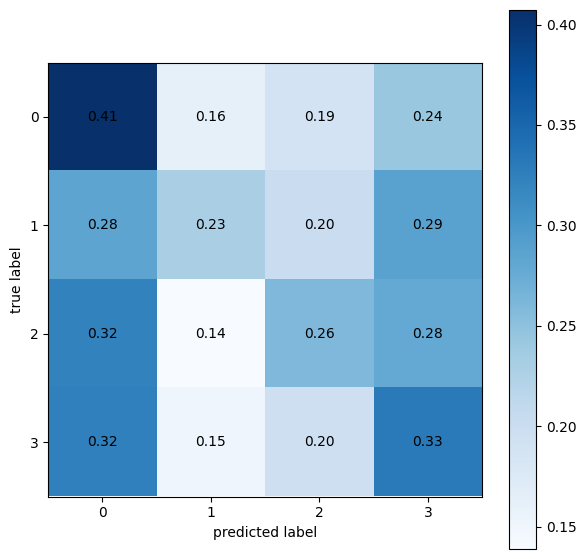

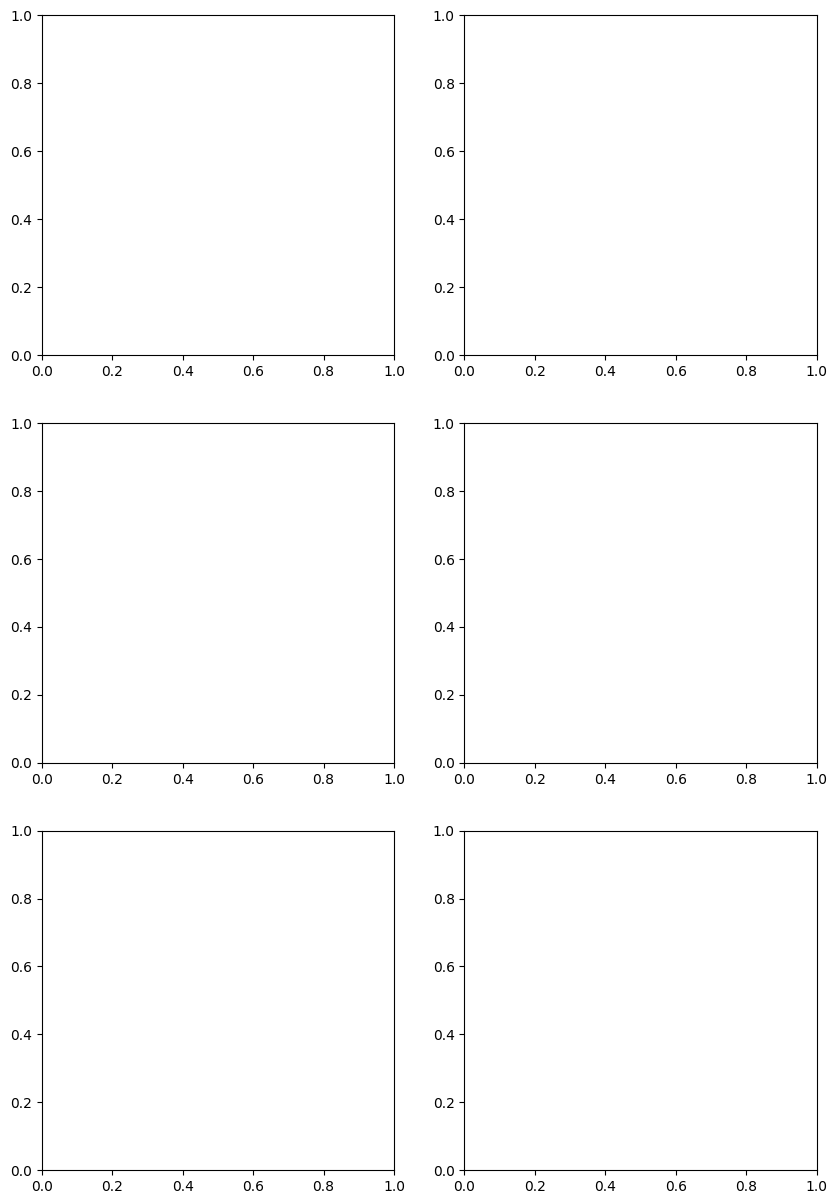

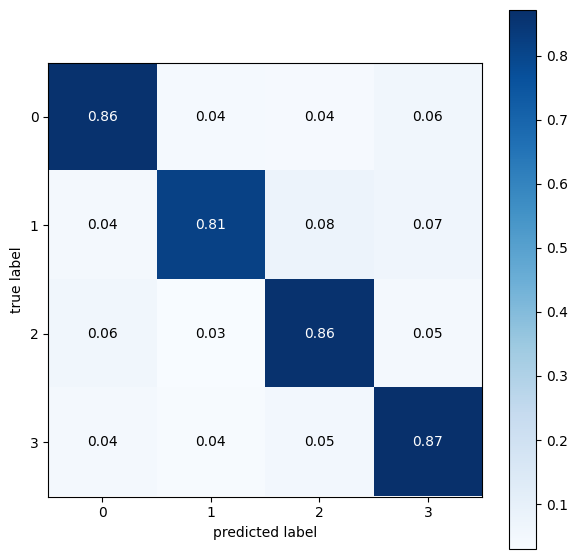

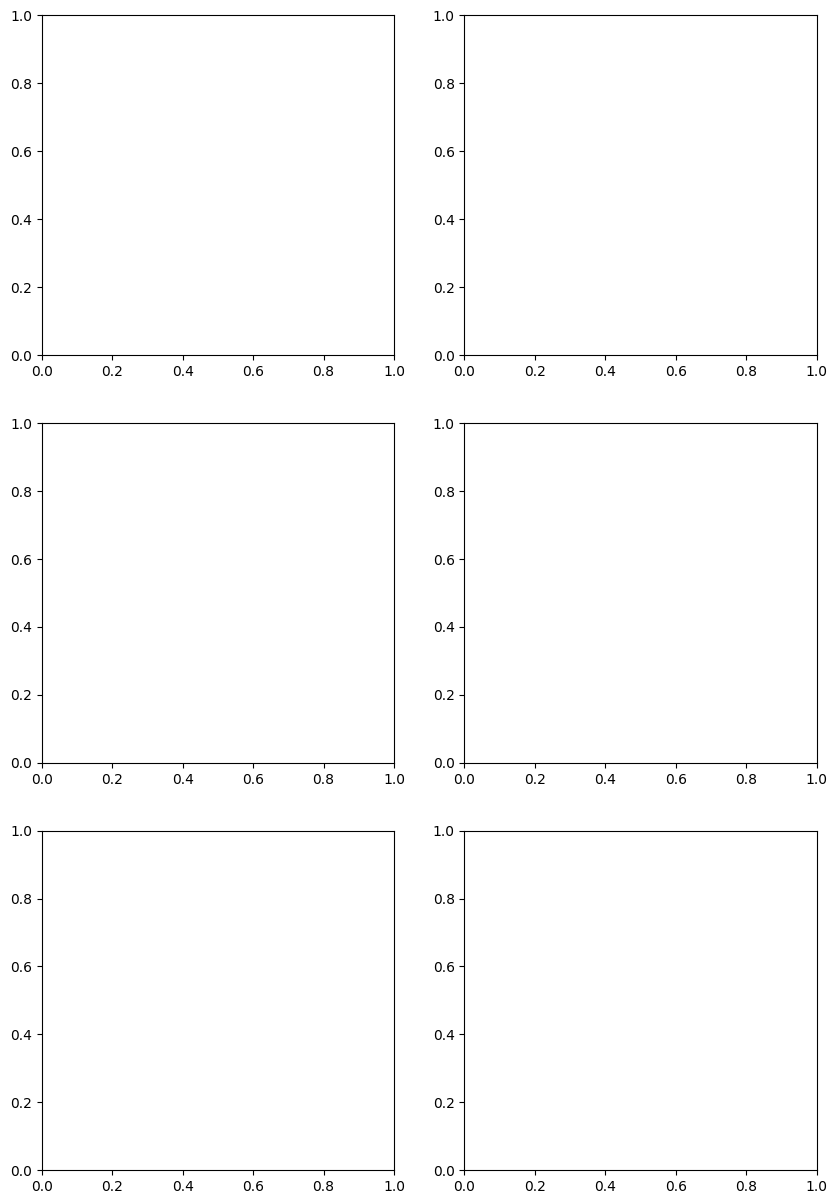

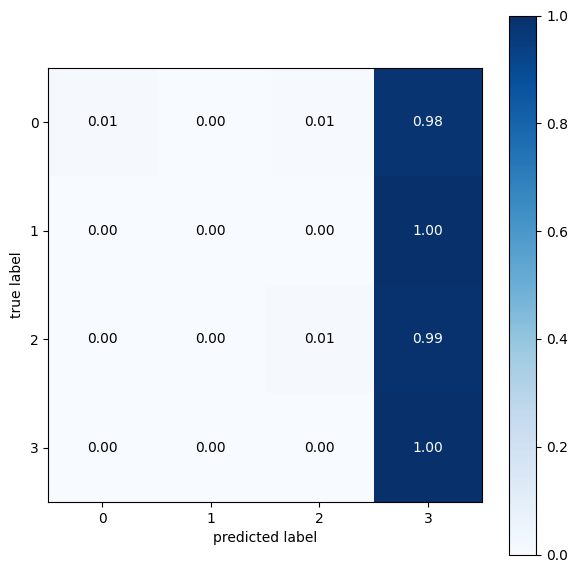

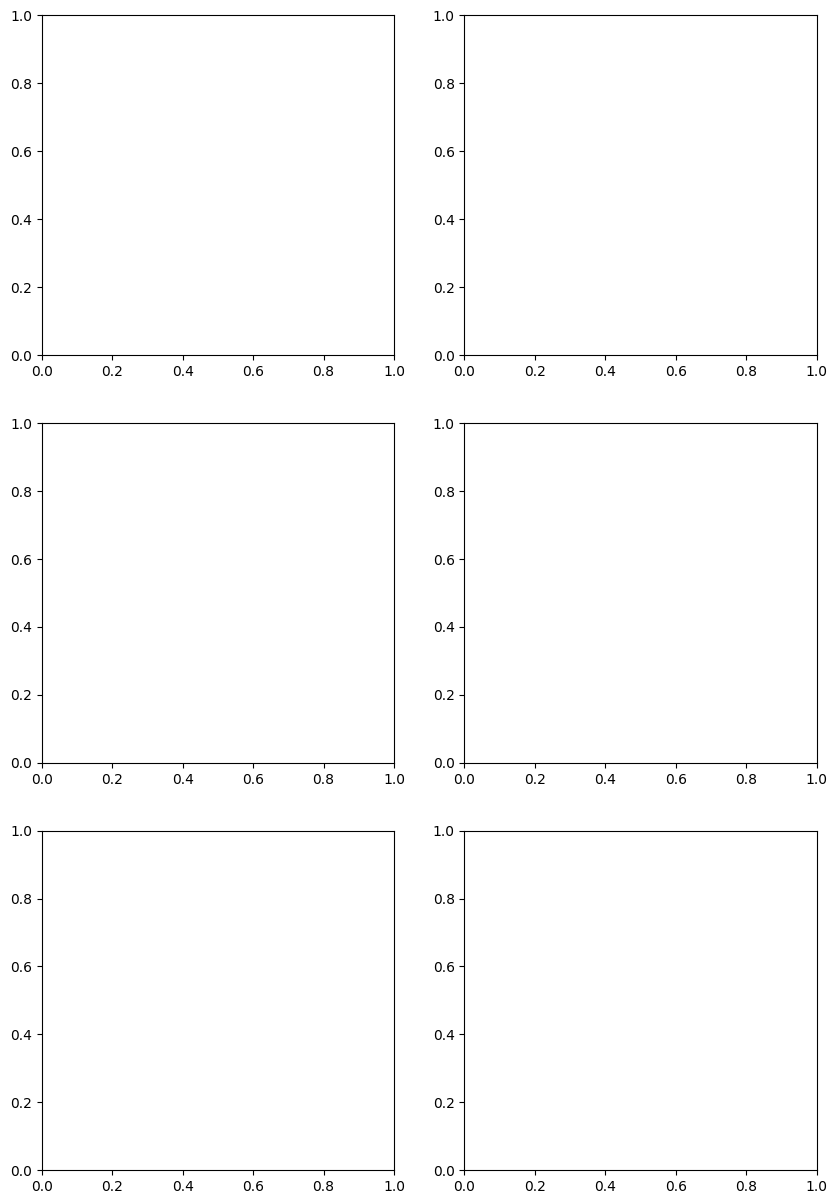

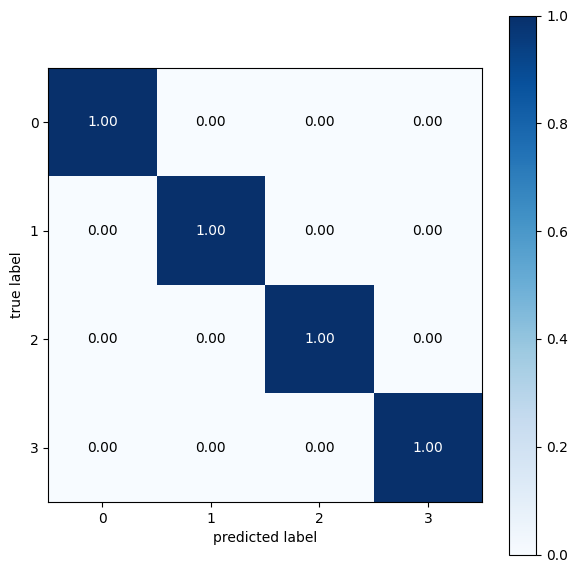

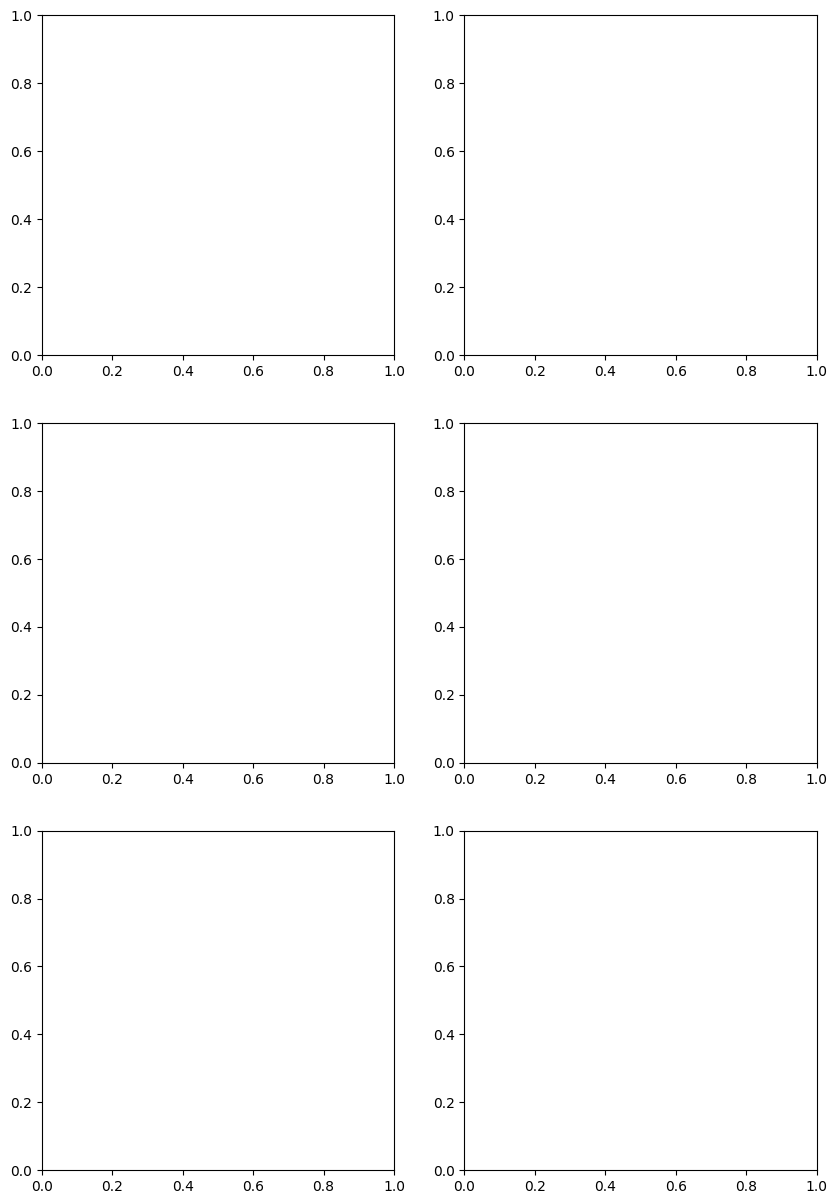

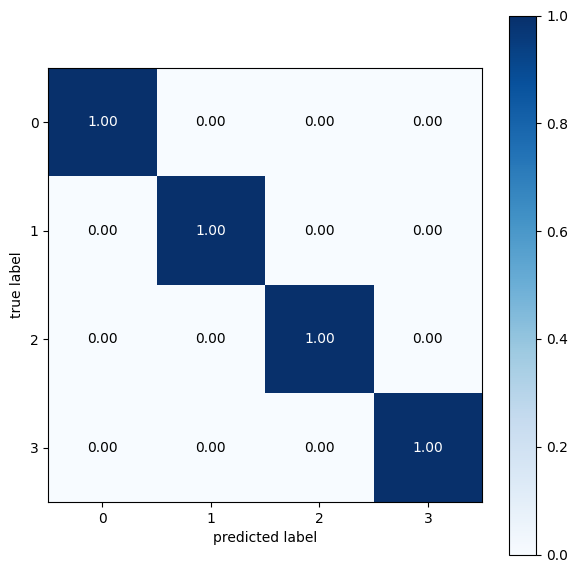

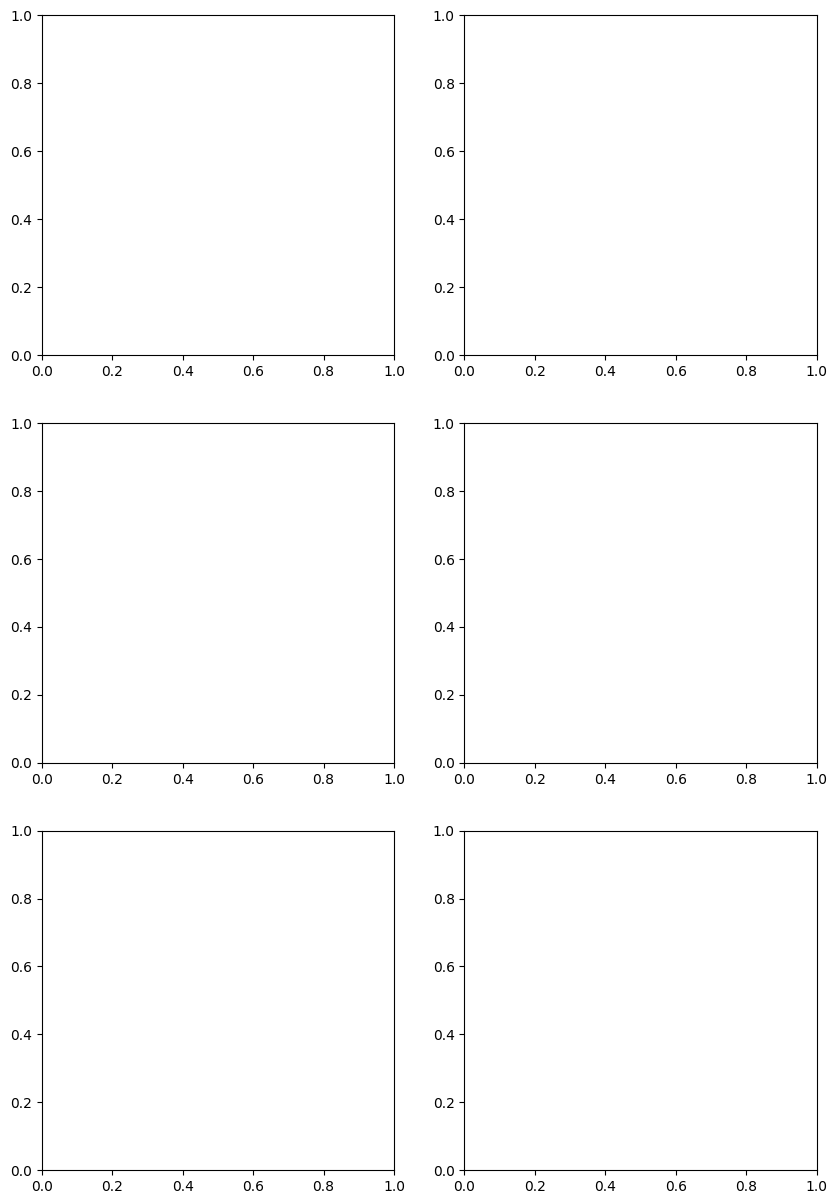

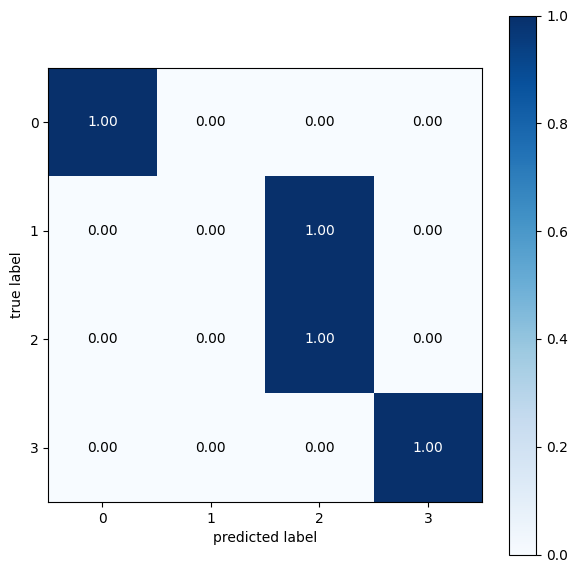

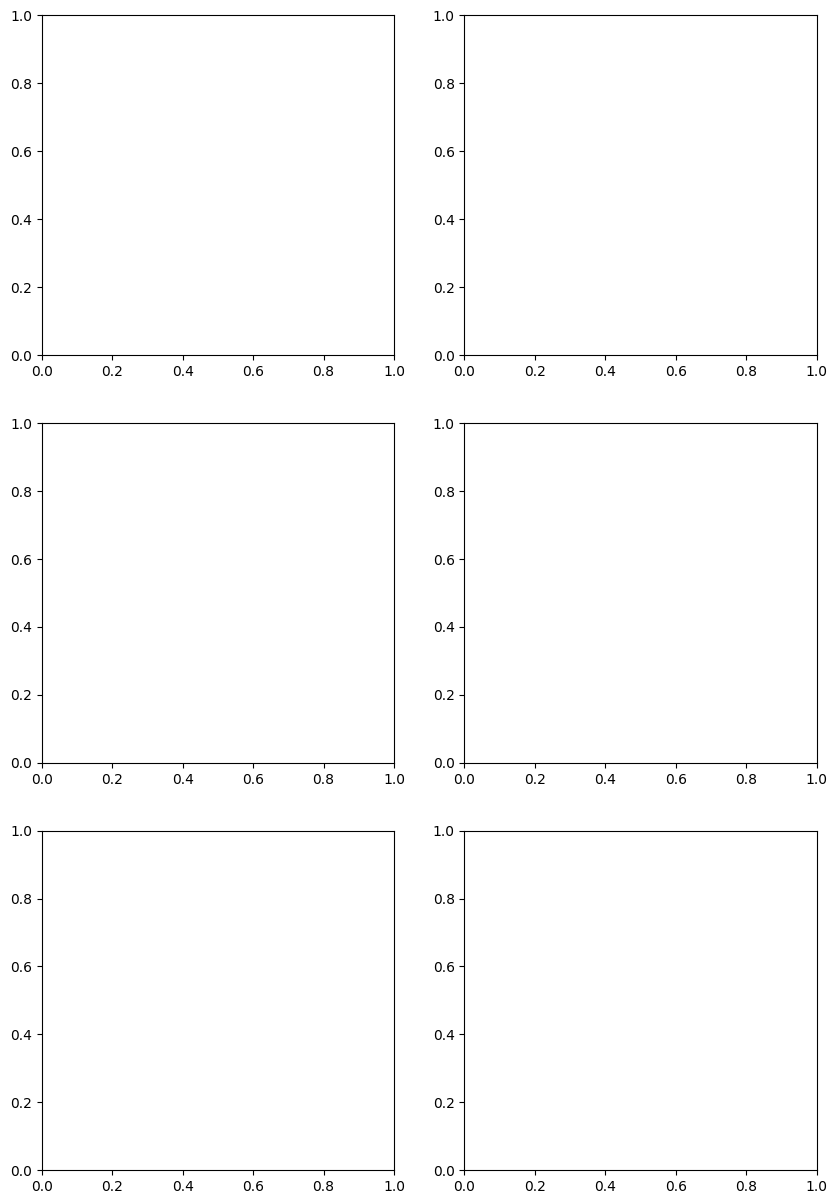

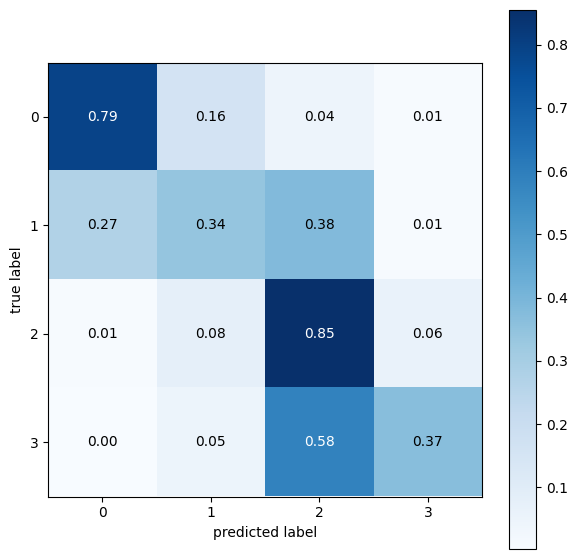

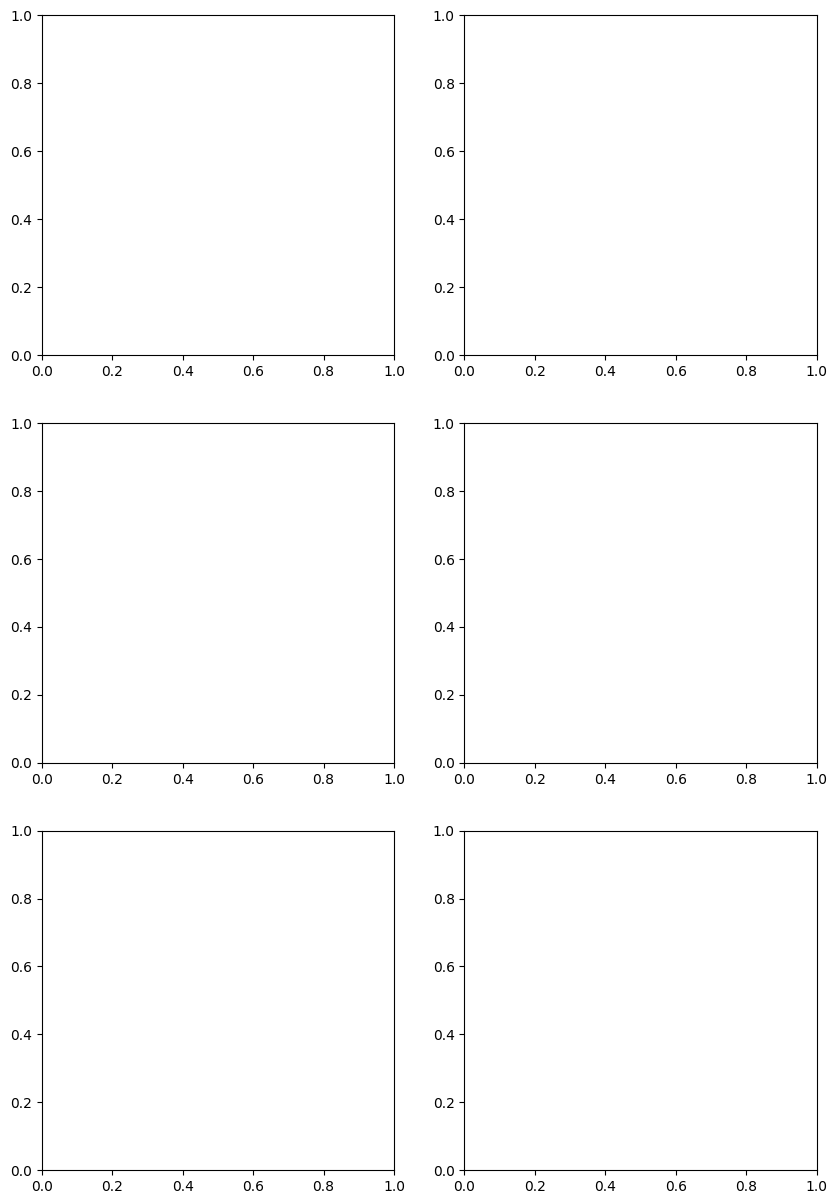

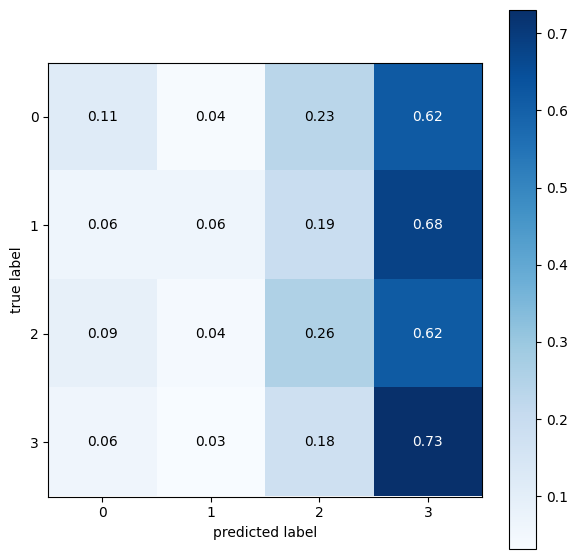

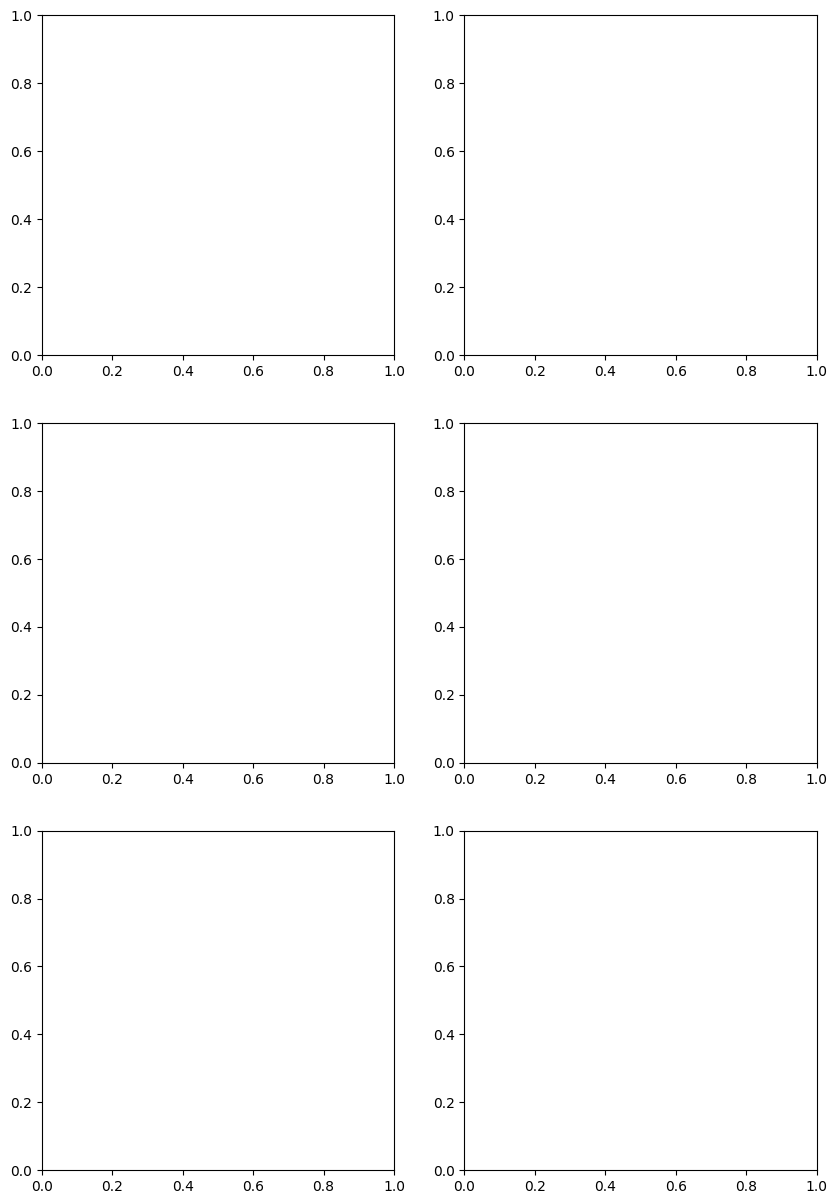

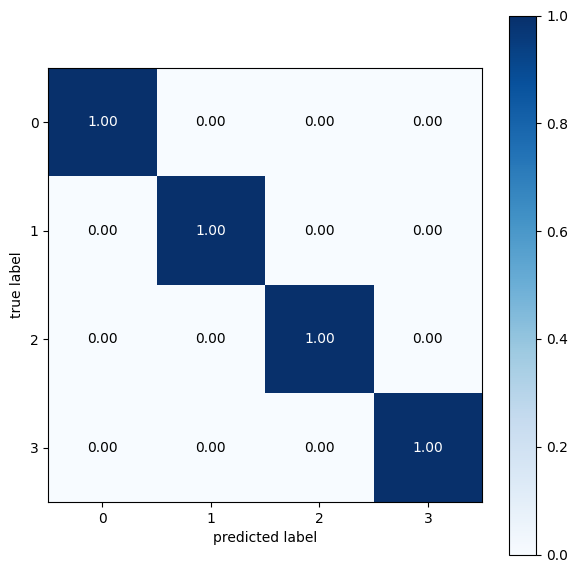

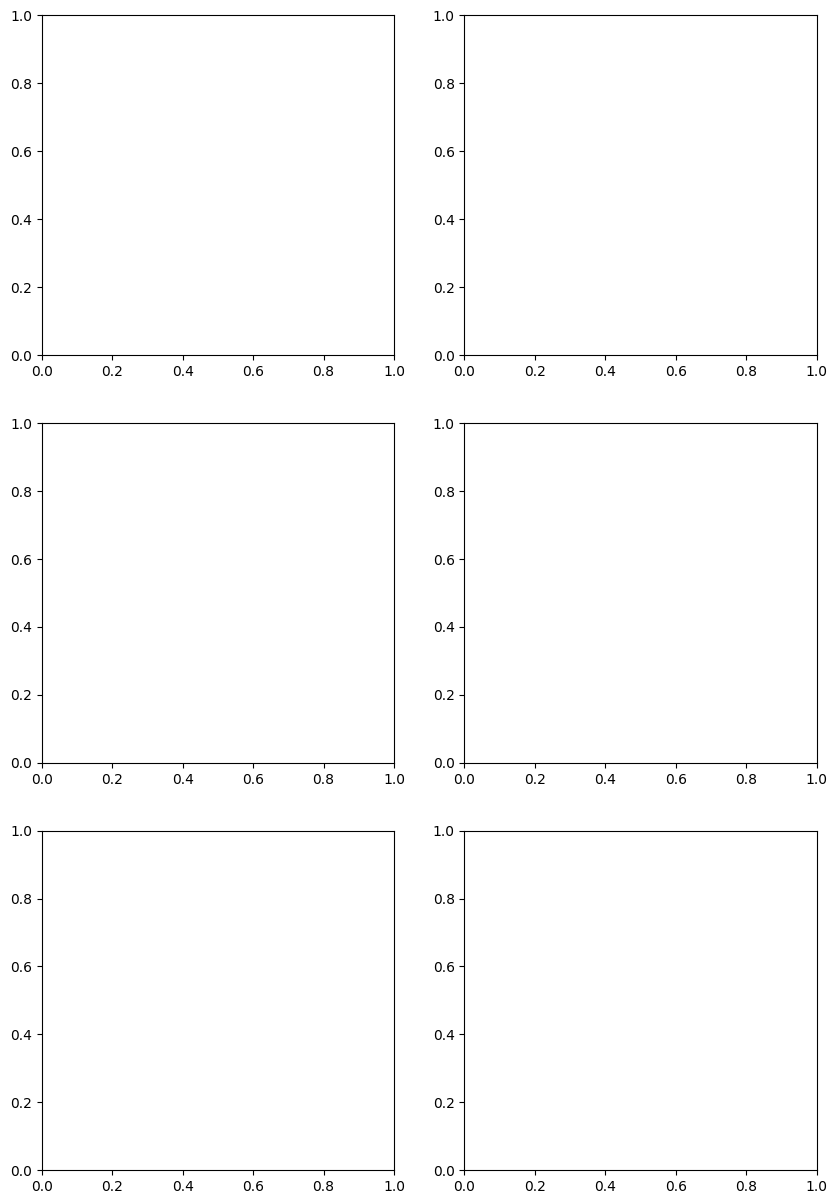

In [ ]:
import time
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    print(clf)
    start_time = time.time()
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(X_test)

    acc = accuracy_score(y_test,train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

    y_pred = clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred),colorbar=True,show_absolute=False, show_normed=True, figsize=(7,7))
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    print("--- %s seconds ---" % (time.time() - start_time))

    fig, axes = plt.subplots(3, 2, figsize=(10, 15))



    print("complete !!!")

print("="*30)
